In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
N = 400
x = np.random.rand(N) * 8 - 4     # [-4,4)
x = np.random.rand(N) * 4*np.pi     # [-4,4)
x.sort()

In [3]:
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)*0.5
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + np.random.randn(N)*0.5
np.set_printoptions(suppress=True)

In [4]:
y = np.vstack((y1, y2)).T
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

In [5]:
deep = 10
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)
x_test = np.linspace(x.min(), x.max(), num=1000).reshape(-1, 1)
y_hat = dt.predict(x_test)

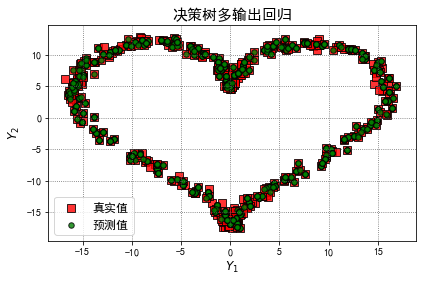

In [6]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', edgecolor='k', s=60, label='真实值', alpha=0.8)
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolor='k', edgecolors='g', s=30, label='预测值', alpha=0.8)
plt.legend(loc='lower left', fancybox=True, fontsize=12)
plt.xlabel('$Y_1$', fontsize=12)
plt.ylabel('$Y_2$', fontsize=12)
plt.grid(b=True, ls=':', color='#606060')
plt.title('决策树多输出回归', fontsize=15)
plt.tight_layout(1)
plt.show()